In [36]:
# onderzoeksvraag: Kan je op basis van score en prijs welke regio de wijn zijn oorsprong heeft?
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

In [37]:
# importeer nodige libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [38]:
# lees het bestand in
redwines = pd.read_csv("redwine.csv", delimiter=";", encoding='iso-8859-1')

In [39]:
# verwijder onnodige kolommen
redwines.drop(['country','variety'],axis=1, inplace=True)

In [40]:
# set column id als index
redwines.set_index('id', inplace=True)

In [41]:
# voeg jaartal toe als aparte kolom, en verwijder nan rijen voor jaren (2465 naar 2461)
redwines['year'] = redwines['title'].str.extract(r"([1][9][9]\d|[2][0][0,1,2]\d)")
redwines = redwines[redwines['year'].notnull()]

In [42]:
# drop rows with nan value in it
redwines.dropna(inplace=True)

## wijnen per regio
Interessant om te weten waar de wijn vandaan komt en of er een wijnsoort veelal lekkerder is uit een bepaalde regio en/of duurder kan worden achterhaald.


In [43]:
# processing all rows into average per month
redwines['count'] = 1
avg_per_province = redwines.groupby('province').sum() 
avg_per_province.loc[:, "points":"sulphates"] = avg_per_province.loc[:, "points":"sulphates"].div(avg_per_province['count'], axis=0)
avg_per_province['province'] = avg_per_province.index

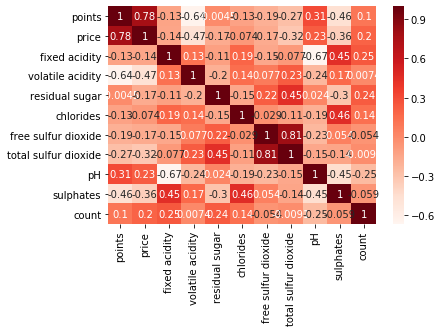

In [44]:
# correlation of average per month.
correlation = avg_per_province.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)

tussen price en points zit een aardige correlatie. Wat betekent dat per regio de verhouding van punten gegeven door wijnproevers en de prijs aardig hoog ligt.

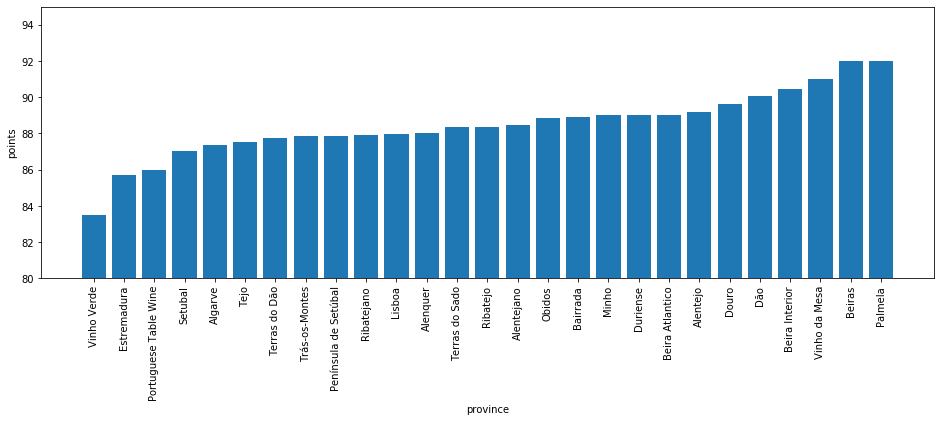

In [45]:
# avg points per provincie
avg_points_sorted = avg_per_province.sort_values(by=['points'])
plt.figure(figsize=(16,5))
plt.xticks(np.arange(27),(avg_points_sorted.index), rotation='vertical')
plt.ylim(80, 95)
plt.bar(avg_points_sorted['province'], avg_points_sorted['points'])
plt.xlabel('province')
plt.ylabel('points')
plt.show()

De punten liggen niet ver van elkaar af. Op basis van alleen punten zullen we dus niet kunnen zien waarvan de wijn vandaan zou komen.

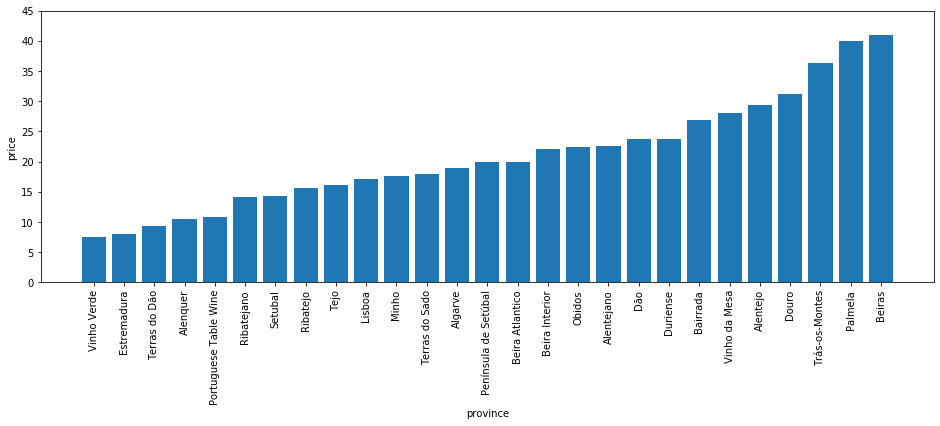

In [46]:
# avg price per provincie
avg_points_sorted = avg_per_province.sort_values(by=['price'])
plt.figure(figsize=(16,5))
plt.xticks(np.arange(27),(avg_points_sorted.index), rotation='vertical')
plt.ylim(0, 45)
plt.bar(avg_points_sorted['province'], avg_points_sorted['price'])
plt.xlabel('province')
plt.ylabel('price')
plt.show()

De prijs per wijn verschilt aardig. Er zitten enkele provincies die gemiddeld dezelfde prijs hebben. 

In [47]:
# give avg a variable
avg_price = avg_per_province['price']
avg_points = avg_per_province['points']
index = avg_per_province.index

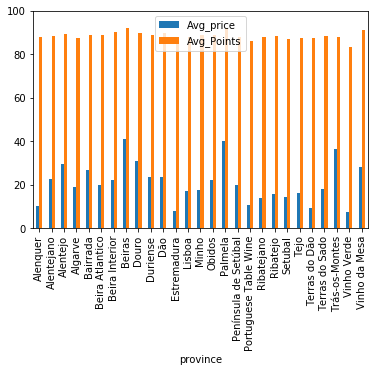

In [48]:
# display the charts
df = pd.DataFrame({'Avg_price': avg_price,
                   'Avg_Points': avg_points}, index = index)
ax = df.plot.bar(ylim=[0,100], rot=90)

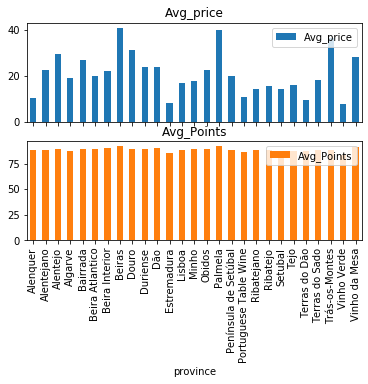

In [49]:
#display the charts with each component seperate
axes = df.plot.bar(rot=90, subplots=True)
axes[1].legend(loc=1)

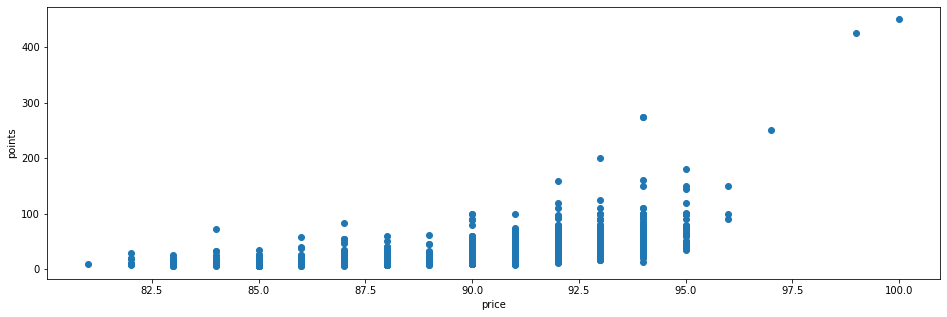

In [50]:
# verdeling van punten t.o.v. price
plt.figure(figsize=(16,5))
plt.scatter(redwines['points'], redwines['price'])
plt.ylabel('points')
plt.xlabel('price')
#plt.ylim(80, 100, 1)
plt.show()


#plt.plot(redwines['price'], redwines['points'])
#plt.xticks(redwines['price'], redwines['price'], rotation='vertical')
#plt.title('avg points per year of wines')
#plt.xlabel('price')
#plt.ylabel('points')
#plt.show()

Hieruit kan men opmaken dat er best veel verschil zit tussen hoe lekker de proevers een bepaalde wijn vinden van een bepaalde prijs. 

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

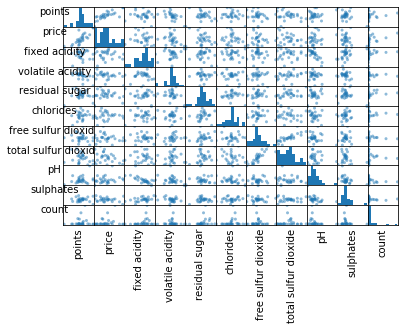

In [51]:

matrix = pd.plotting.scatter_matrix(avg_per_province)
[s.xaxis.label.set_rotation(90) for s in matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in matrix.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.3,0.5) for s in matrix.reshape(-1)]
[s.set_xticks(()) for s in matrix.reshape(-1)]
[s.set_yticks(()) for s in matrix.reshape(-1)]


In [52]:
train, test = train_test_split(avg, test_size=0.2)

NameError: name 'avg' is not defined